In [ ]:
from sympy import exp, symbols, Matrix, log, expand

In [ ]:
def sigmoid(x):
    return 1 / (1 + exp(-x))



d=2
n = 2**d-1
nodes = Matrix(symbols([f'x{i}' for i in range(n)]))

In [ ]:
import torch
def binary(x, bits):
    'converts integer vector into binary with number of `bits`'
    mask = 2**torch.arange(bits, device=x.device, dtype=x.dtype)
    return x.unsqueeze(-1).bitwise_and(mask).ne(0).byte()

def init_tree(depth):
    n_leaves = 2**depth
    mask = binary(torch.arange(0,2**depth), depth).flip(-1)*2-1.
    mask = mask.to(torch.int16)
    tree, res = torch.eye(n_leaves, dtype=mask.dtype), []
    for d in reversed(range(depth)): 
        tree = tree.view(n_leaves, -1, 2).sum(-1)
        res.append(tree*mask[:,d][:,None])
    return torch.cat(list(reversed(res)),dim=1)

## Products of probs

In [ ]:
m = Matrix(init_tree(d))

In [ ]:
probs = Matrix([sum(-1*m.row(r).multiply_elementwise(nodes.T)).args for r in range(m.rows)]).applyfunc(sigmoid)

In [ ]:
from sympy import prod, simplify


sum(simplify(Matrix([prod(probs.row(r)) for r in range(m.rows)])))

exp(x2)/((exp(x0) + 1)*(exp(x2) + 1)) + 1/((exp(x0) + 1)*(exp(x2) + 1)) + exp(x0)/((exp(x0) + 1)*(exp(x1) + 1)) + exp(x0 + x1)/((exp(x0) + 1)*(exp(x1) + 1))

## Softmax

In [ ]:
def softmax(vector):
    """Compute softmax values for each element in the vector."""
    exp_values = [exp(val) for val in vector]
    exp_sum = sum(exp_values)
    softmax_values = [exp_val / exp_sum for exp_val in exp_values]
    return softmax_values

In [ ]:
probs = Matrix([sum(-1*m.row(r).multiply_elementwise(nodes.T)) for r in range(m.rows)])

In [ ]:
sum(simplify(Matrix(softmax(probs))))

exp(x2)/(exp(x2) + exp(2*x0 - x1) + exp(2*x0 + x1) + exp(-x2)) + exp(2*x0 - x1)/(exp(x2) + exp(2*x0 - x1) + exp(2*x0 + x1) + exp(-x2)) + exp(2*x0 + x1)/(exp(x2) + exp(2*x0 - x1) + exp(2*x0 + x1) + exp(-x2)) + exp(-x2)/(exp(x2) + exp(2*x0 - x1) + exp(2*x0 + x1) + exp(-x2))

## Graphs

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

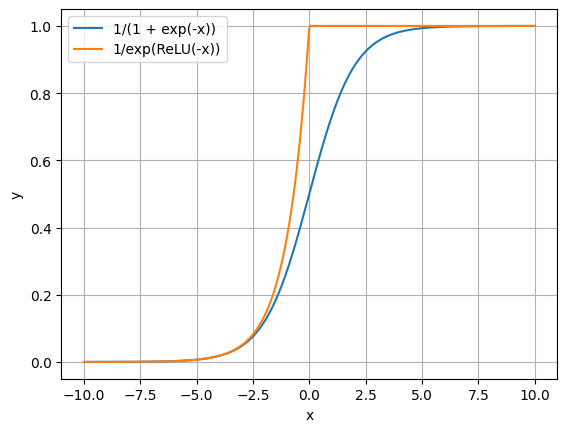

In [ ]:
x = sp.Symbol('x')
expr = 1/exp(-log(sigmoid(x)))

func = sp.lambdify(x, expr, 'numpy')

x_values = np.linspace(-10, 10, 500)  # Define the range of x values
y_values = func(x_values)  # Evaluate the expression for each x value


plt.plot(x_values, y_values, label=expr)
plt.plot(x_values, 1/np.exp(np.maximum(-x_values,0)), label='1/exp(ReLU(-x))')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## ReLU of sum vs sum of ReLUs

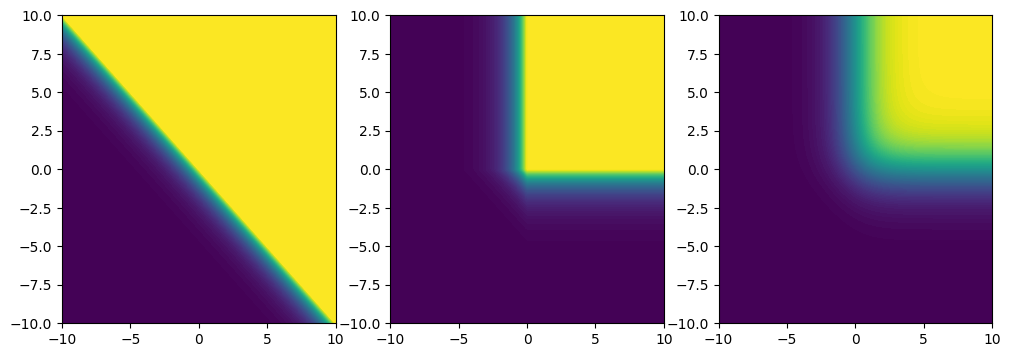

In [ ]:
x = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x,x)

_, axes = plt.subplots(ncols=3,figsize=(12,4))
co1 = axes[0].contourf(X, Y, np.exp(-np.maximum(-X-Y,0)), levels=np.linspace(0, 1, 100))
co2 = axes[1].contourf(X, Y, np.exp(-np.maximum(-X,0)-np.maximum(-Y,0)), levels=np.linspace(0, 1, 100))
co3 = axes[2].contourf(X, Y, 1/(1+np.exp(-X))/(1+np.exp(-Y)), levels=np.linspace(0, 1, 100))

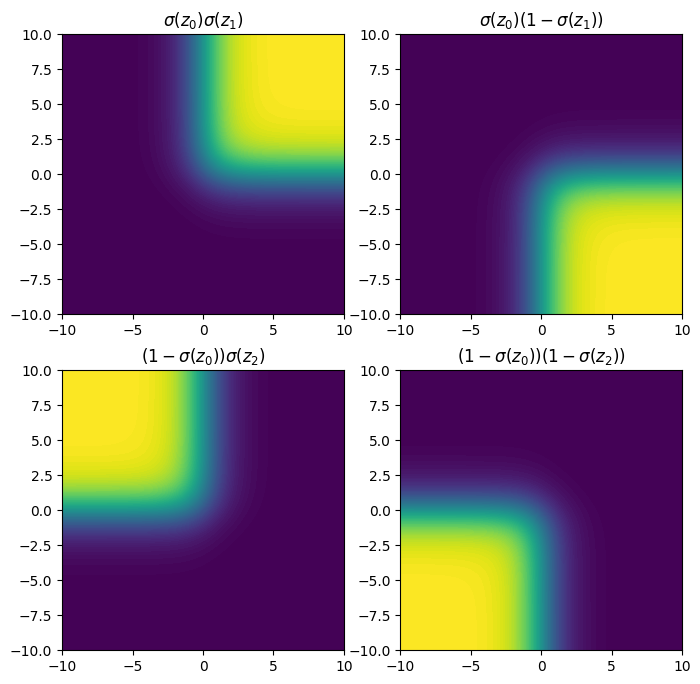

In [ ]:
x = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x,x)

_, axes = plt.subplots(ncols=2, nrows=2,figsize=(8,8))
co2 = axes[0,1].contourf(X, Y, 1/(1+np.exp(-X))/(1+np.exp(Y)), levels=np.linspace(0, 1, 100))
co3 = axes[0,0].contourf(X, Y, 1/(1+np.exp(-X))/(1+np.exp(-Y)), levels=np.linspace(0, 1, 100))
axes[0,1].set_title('$\sigma(z_0)(1-\sigma(z_1))$')
axes[0,0].set_title('$\sigma(z_0)\sigma(z_1)$')
co2 = axes[1,1].contourf(X, Y, 1/(1+np.exp(X))/(1+np.exp(Y)), levels=np.linspace(0, 1, 100))
co3 = axes[1,0].contourf(X, Y, 1/(1+np.exp(X))/(1+np.exp(-Y)), levels=np.linspace(0, 1, 100))
axes[1,1].set_title('$(1-\sigma(z_0))(1-\sigma(z_2))$')
axes[1,0].set_title('$(1-\sigma(z_0))\sigma(z_2)$');

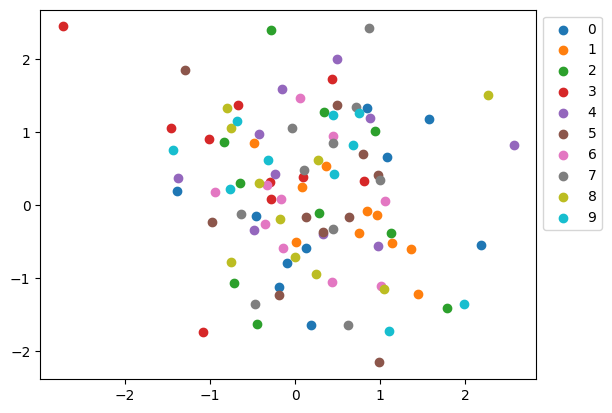

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x,y = np.random.randn(2,100)
labels = np.array(range(0,100))%10
for i in range(10):
    plt.scatter(x[labels==i], y[labels==i], label=i)
leg = plt.legend()
leg.set_bbox_to_anchor((1, 1))